# Задание 1

Подключаем необходимые библиотеки

In [21]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


Считываем данные и формируем dataset с необходимыми столбцами и полями. Выводим для наглядности немного данных.

In [2]:
dataset = pd.read_csv('./iris.data',
                      header=None,
                      names=['длина чашелистика', 'ширина чашелистика',
                             'длина лепестка', 'ширина лепестка', 'класс'])
dataset.sample(5, random_state=0)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


## Задание 1

Постройте таблицу pairplot для визуального анализ данных

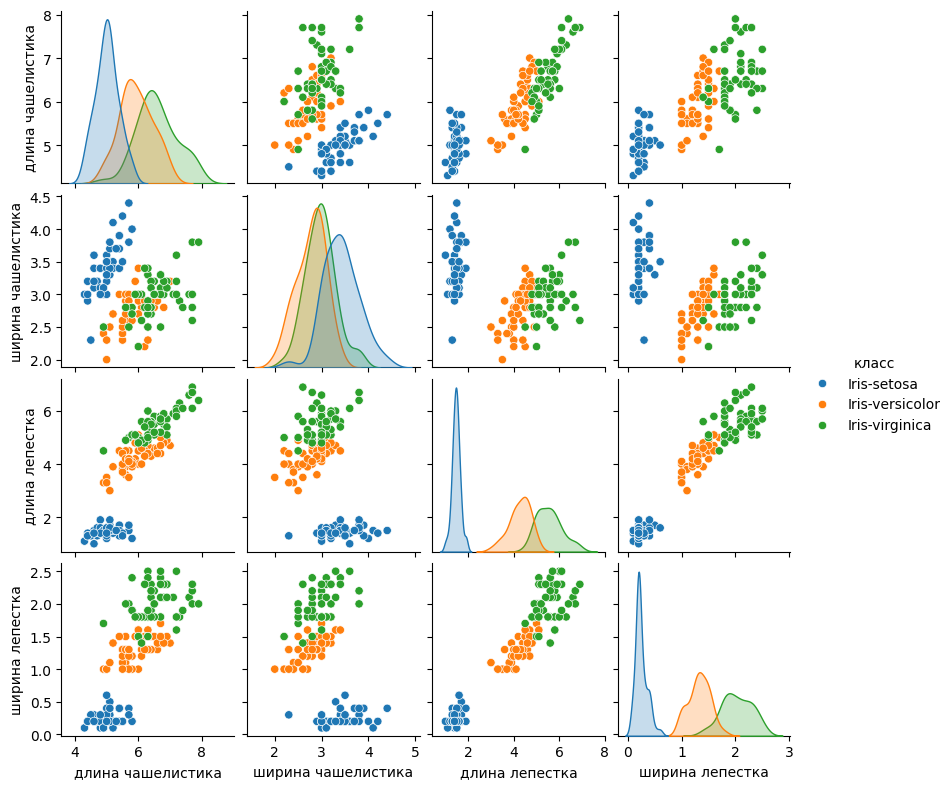

In [3]:
sns.pairplot(dataset, hue='класс', height=2)
plt.show()

## Задание 2

Постройте LogisticRegression для бинарной классификации элементов датасета, на примере данных

Для построения бинарной классификации необходимо создать бинарный dataset. Для этого удалим один из трех классов и зададим значения оставшимся 1 или -1.

In [4]:
binary_dataset = dataset.drop(index=dataset.index[dataset['класс'] == 'Iris-setosa'])

binary_dataset.loc[dataset['класс'] == 'Iris-versicolor', dataset.columns == 'класс'] = -1
binary_dataset.loc[dataset['класс'] == 'Iris-virginica', dataset.columns == 'класс'] = 1

Далее сформируем: матрицу объектов - X и вектор ответов - y

In [5]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'класс'].values
y = binary_dataset.iloc[:, binary_dataset.columns == 'класс'].values.reshape(-1)

Преобразуем

In [6]:
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.int64)

Сделаем модель LogisticRegression и обучим

In [7]:
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, y)

Получаем вектор оптимальных параметров

In [8]:
model.coef_

array([[-3.94857799e-01, -5.12236925e-01,  2.93150207e+00,
         2.41616121e+00, -1.17463494e-03]])

## Задание 3

Покажите переобучение модели линейной регрессии и предложите способ борьбы с ним

In [9]:
# Генерация данных
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 3 + np.random.normal(0, 2, 100)  # Линейная зависимость с шумом

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Преобразование X в двумерный массив (требуется для Scikit-learn)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [10]:
# Добавление полиномиальных признаков
poly = PolynomialFeatures(degree=15)  # Высокая степень полинома
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Оценка качества
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Ошибка на обучающей выборке: {train_error}")
print(f"Ошибка на тестовой выборке: {test_error}")

Ошибка на обучающей выборке: 3.0684458717511998
Ошибка на тестовой выборке: 2.8902308540786703


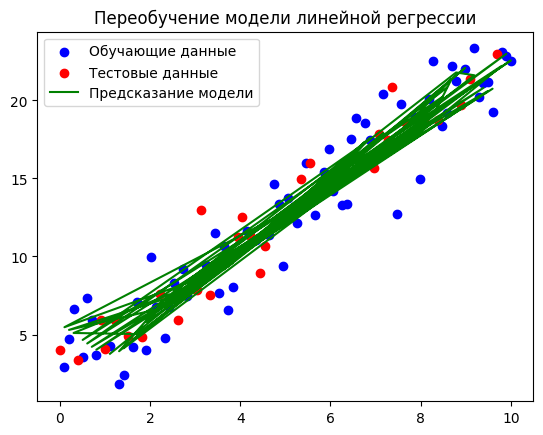

In [11]:
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.plot(X_train, y_train_pred, color='green', label='Предсказание модели')
plt.legend()
plt.title("Переобучение модели линейной регрессии")
plt.show()

На графике видно, что модель слишком сложная и "колеблется", пытаясь пройти через все точки обучающих данных, что подтверждает переобучение.

Варианты борьбы с переобучением:

1) Уменьшение сложности модели (уменьшаем степень полинома)

In [12]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Оценка качества
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Ошибка на обучающей выборке: {train_error}")
print(f"Ошибка на тестовой выборке: {test_error}")

Ошибка на обучающей выборке: 3.688888226610536
Ошибка на тестовой выборке: 2.2282947891857225


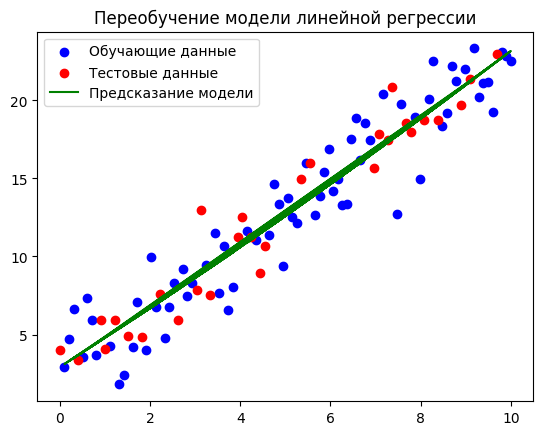

In [13]:
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.plot(X_train, y_train_pred, color='green', label='Предсказание модели')
plt.legend()
plt.title("Переобучение модели линейной регрессии")
plt.show()

2) Регуляризация

Добавьте регуляризацию, например, Ridge (L2) или Lasso (L1), чтобы штрафовать модель за слишком большие коэффициенты.

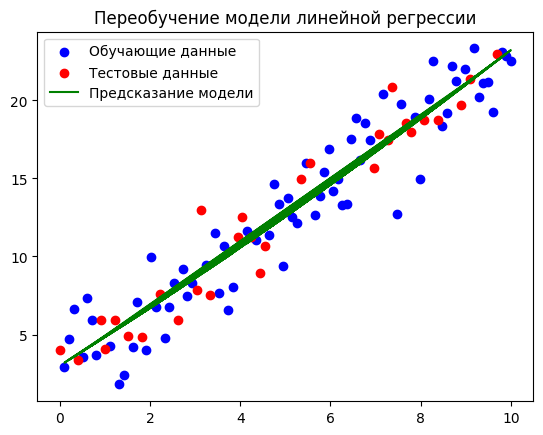

In [14]:
# Ridge регрессия с регуляризацией
ridge_model = Ridge(alpha=1.0)  # alpha — параметр регуляризации
ridge_model.fit(X_train_poly, y_train)

# Предсказание
y_train_pred = ridge_model.predict(X_train_poly)
y_test_pred = ridge_model.predict(X_test_poly)

plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.plot(X_train, y_train_pred, color='green', label='Предсказание модели')
plt.legend()
plt.title("Переобучение модели линейной регрессии")
plt.show()

## Задание 4

Обогатите датасет сгенерированными вами данными. Опишите какой способ вы применяли и приложите код генерации данных.

In [15]:
dataset = pd.read_csv('./iris.data',
                      header=None,
                      names=['длина чашелистика', 'ширина чашелистика',
                             'длина лепестка', 'ширина лепестка', 'класс'])
dataset.head()

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Обоготим данные, используя генерацию данных на основе среднего и стандартного отклонения. Метод - Нормальное расперделение.

In [16]:
def generate_new_data(df, filter, num_samples=10):
    new_data = {
        'длина чашелистика': np.random.normal(df['длина чашелистика'].mean(), df['длина чашелистика'].std(), num_samples),
        'ширина чашелистика': np.random.normal(df['ширина чашелистика'].mean(), df['ширина чашелистика'].std(), num_samples),
        'длина лепестка': np.random.normal(df['длина лепестка'].mean(), df['длина лепестка'].std(), num_samples),
        'ширина лепестка': np.random.normal(df['ширина лепестка'].mean(), df['ширина лепестка'].std(), num_samples),
        'класс': np.random.choice(df['класс'].unique(), num_samples)
    }
    return pd.DataFrame(new_data)

# Генерация новых данных
new_irics_setos_df = generate_new_data(dataset, "Iris-setosa", num_samples=50)
new_iris_virginica_df = generate_new_data(dataset, "Iris-virginica", num_samples=50)
new_iris_versicolour_df = generate_new_data(dataset, "Iris-versicolor", num_samples=50)


# Объединение исходного и нового датасетов
enriched_df = pd.concat([dataset, new_irics_setos_df, new_iris_virginica_df, new_iris_versicolour_df], ignore_index=True)

enriched_df.tail(100)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
200,5.833192,2.689901,1.670901,1.101045,Iris-versicolor
201,5.100347,2.794107,0.160604,0.469436,Iris-setosa
202,5.906105,2.133091,3.283320,-0.027310,Iris-versicolor
203,5.282599,2.826036,5.024713,1.353942,Iris-virginica
204,6.650797,2.724844,6.409456,0.621449,Iris-virginica
...,...,...,...,...,...
295,7.498900,3.543810,5.078419,1.108310,Iris-virginica
296,6.437966,2.803246,5.532089,1.026951,Iris-setosa
297,7.141405,2.659187,2.863334,2.120254,Iris-setosa
298,4.868049,2.676398,3.177588,1.374565,Iris-setosa


## Задание 5

Поэкспериментируйте с возможными AutoML моделями для усовершенствования эталонного решения.

### AutoML H2O

In [18]:
import h2o
from h2o.automl import H2OAutoML

# Инициализация H2O
h2o.init()

# Загрузка данных
data = h2o.import_file('./iris.data')
# Разделение данных на train и test
train, test = data.split_frame(ratios=[0.8], seed=42)

# Указание целевой переменной и признаков
y = "C5"  # Замените на имя целевой переменной
x = data.columns
x.remove(y)

# Запуск AutoML
aml = H2OAutoML(max_models=10, seed=42, max_runtime_secs=300)
aml.train(x=x, y=y, training_frame=train)

# Просмотр результатов
lb = aml.leaderboard
print(lb)

# Предсказание на тестовых данных
preds = aml.leader.predict(test)
print(preds)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /home/user/myenv/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpycwsmer0
  JVM stdout: /tmp/tmpycwsmer0/h2o_user_started_from_python.out
  JVM stderr: /tmp/tmpycwsmer0/h2o_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,11 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,"14 days, 1 hour and 46 minutes"
H2O_cluster_name:,H2O_from_python_user_72yts4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,980 Mb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |████
17:46:47.383: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 121.0.

███████████████████████████████████████████████████████████| (done) 100%
model_id                                                   mean_per_class_error    logloss      rmse        mse
GLM_1_AutoML_1_20250410_174640                                        0.0337607  0.0658835  0.144692  0.0209358
XGBoost_2_AutoML_1_20250410_174640                                    0.050641   0.22214    0.225561  0.0508775
XGBoost_3_AutoML_1_20250410_174640                                    0.050641   0.159337   0.201207  0.0404842
GBM_5_AutoML_1_20250410_174640                                        0.050641   0.150181   0.205673  0.0423012
GBM_3_AutoML_1_20250410_174640                                        0.050641   0.139066   0.1

### AutoML TPOT

In [24]:
from tpot import TPOTClassifier

df = pd.read_csv('./iris.data',
                      header=None,
                      names=['sepal length', 'sepal width',
                             'petal length', 'petal width', 'class'])
#df.sample(5, random_state=0)
le = LabelEncoder()
y_encoder = le.fit_transform(df['class'])
# Загрузка данных
X = df.drop('class', axis=1)
y = df['class']

# Разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('class', axis=1),
    y_encoder,
    test_size=0.2, 
    random_state=42,
    stratify=y_encoder
)

# Создание и обучение TPOT
tpot = TPOTClassifier(generations=5, population_size=30, random_state=42, verbose=2)
tpot.fit(X_train, y_train)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, tpot.predict(X_test)))

/home/user/myenv/lib/python3.10/site-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
Generation: 100%|████████████████████████████████| 5/5 [08:22<00:00, 100.60s/it]


Accuracy: 0.9333333333333333
